In [18]:
import pandas as pd

file_path = 'googleplaystore_user_reviews.csv'
reviews_data = pd.read_csv(file_path)



In [22]:
reviews_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [43]:
import pandas as pd

# Load the dataset
file_path = 'twitter_training.csv'
twitter_data = pd.read_csv(file_path)

# Display the column names of the dataset
twitter_data.columns


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all , cleaned_text  
0  I am coming to the borders and I will kill you...        positive  
1  im getting on borderlands and i will kill you ...        positive  
2  im coming on borderlands and i will murder you...        positive  
3  im getting on borderlands 2 and i will murder ...        positive  
4  im getting into borderlands and i can murder y...        positive  


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sudarshan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all , cleaned_text  \
0  I am coming to the borders and I will kill you...        positive   
1  im getting on borderlands and i will kill you ...        positive   
2  im coming on borderlands and i will murder you...        positive   
3  im getting on borderlands 2 and i will murder ...        positive   
4  im getting into borderlands and i can murder y...        positive   

                                    sentiment_scores  compound sentiment  
0  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...    0.5574  positive  
1  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...    0.5574  positive  
2  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...    0.5574  positive  
3  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...    0.5574

C:\Users\sudarshan\AppData\Local\Temp\ipykernel_2372\1415278892.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


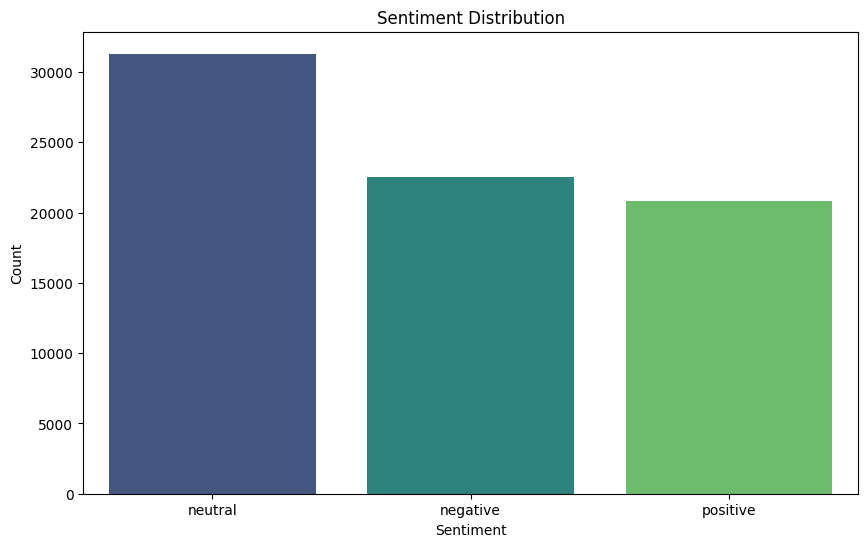

In [40]:
import pandas as pd
import re
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'twitter_training.csv'
twitter_data = pd.read_csv(file_path)

print(twitter_data.columns)

text_column_name = 'text'  # Replace 'text' with the actual name of the text column

def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

twitter_data['cleaned_text'] = twitter_data['Positive'].apply(preprocess_text)
print(twitter_data.head())

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

twitter_data['sentiment_scores'] = twitter_data['cleaned_text'].apply(lambda x: sid.polarity_scores(x))
twitter_data['compound'] = twitter_data['sentiment_scores'].apply(lambda x: x['compound'])
twitter_data['sentiment'] = twitter_data['compound'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))
print(twitter_data.head())


sentiment_counts = twitter_data['sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(10,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


